## Exploratory Data Analysis

In [1]:
# importing the necessary libraries and packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading in the data

df=pd.read_csv('sonar.all-data.csv')

In [3]:
# checking out the first 5 rows

df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

<AxesSubplot:>

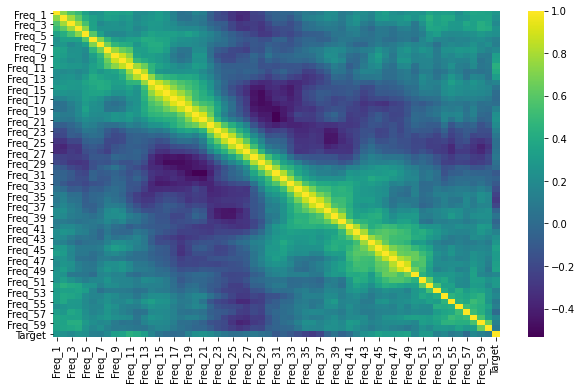

In [45]:
# heatmap to show the correlation between the different frequencies

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='viridis')

In [6]:
# what are our unique labels?

df['Label'].unique()

array(['R', 'M'], dtype=object)

`R` represents `rock` while `M` represents `mine(metal cylinder)`.

In [7]:
# in order to find out how correlated each frequency is to the Label, we need to map the Label to 0s and 1s

df['Target']=df['Label'].map({'R':0, 'M':1})

In [12]:
# top 5 frequency responses that are most correlated to the Label

df.corr()['Target'].sort_values(ascending=False)[1:6]

Freq_11    0.432855
Freq_12    0.392245
Freq_49    0.351312
Freq_10    0.341142
Freq_45    0.339406
Name: Target, dtype: float64

## Machine Learning

In [14]:
# separating the features(X) and the label(y)

X=df.drop(['Label','Target'], axis=1)
y=df['Label']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### setting up a pipeline

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
# an instance of the scaler object
# since we are using a pipeline we need not manually scale our data
# scaling will be done inside the pipeline

scaler=StandardScaler()

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# an instance of the model

knn_model=KNeighborsClassifier()

In [21]:
# checking out knn parameters
# when setting up our parameter grid, we will need the exact string codes of whichever parameters we intend to use

knn_model.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [22]:
# a list of the order of operations to be passed into our pipeline

operations=[('scaler',scaler),('knn_model',knn_model)]

In [23]:
# importing pipeline

from sklearn.pipeline import Pipeline

In [24]:
# a pipeline with the operations we defined

pipe=Pipeline(operations)

### the model

In [25]:
# importing gridsearchcv to test various k values and report back the best parameters

from sklearn.model_selection import GridSearchCV

In [26]:
# a list with k values ranging from 1 to 29

k_values=list(range(1,30))

In [27]:
# create a parameter grid
# recall we checked the knn parameters earlier
# here we only use n_neighbors

param_grid={'knn_model__n_neighbors':k_values}

In [28]:
# now we set up the k nearest neighbors classifier

knn_cv=GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy')

In [29]:
# fitting the classifier to our training data

knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn_model', KNeighborsClassifier())]),
             param_grid={'knn_model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                    10, 11, 12, 13, 14, 15, 16,
                                                    17, 18, 19, 20, 21, 22, 23,
                                                    24, 25, 26, 27, 28, 29]},
             scoring='accuracy')

In [30]:
# checking out the params of the best estimator

knn_cv.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn_model', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn_model': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn_model__algorithm': 'auto',
 'knn_model__leaf_size': 30,
 'knn_model__metric': 'minkowski',
 'knn_model__metric_params': None,
 'knn_model__n_jobs': None,
 'knn_model__n_neighbors': 1,
 'knn_model__p': 2,
 'knn_model__weights': 'uniform'}

The classifier decided that 1 neighbor was the way to go.

In [33]:
# a dictionary of the cross validation results

knn_cv.cv_results_

{'mean_fit_time': array([0.02006431, 0.00900364, 0.0090004 , 0.0101965 , 0.01000781,
        0.0099999 , 0.00899949, 0.00999908, 0.0098032 , 0.01033649,
        0.00699935, 0.01117105, 0.01000366, 0.01000285, 0.01058726,
        0.00974092, 0.00699949, 0.00700364, 0.00799994, 0.00899973,
        0.0108532 , 0.00839787, 0.01000414, 0.01000433, 0.00999999,
        0.00999928, 0.01058192, 0.00879736, 0.00800033]),
 'std_fit_time': array([1.82932132e-02, 2.00141493e-03, 2.00038039e-03, 1.77267985e-03,
        1.00740243e-05, 3.23406696e-07, 1.99996154e-03, 1.01601008e-06,
        3.93463897e-04, 1.99565151e-03, 2.44894244e-03, 2.83073227e-03,
        8.06489390e-06, 7.16367493e-06, 1.17526065e-03, 3.08824708e-03,
        2.44960422e-03, 2.44671334e-03, 2.44935120e-03, 2.00004583e-03,
        1.70760162e-03, 1.85389148e-03, 8.18522615e-06, 8.92895882e-06,
        7.53945746e-07, 7.23159356e-07, 1.16362582e-03, 1.93811095e-03,
        2.44985772e-03]),
 'mean_score_time': array([0.02122502, 

In [34]:
# mean test score per k value

knn_cv.cv_results_['mean_test_score']

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

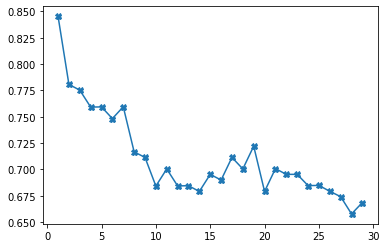

In [37]:
# plot showing the mean test score per k value

plt.plot(range(1,30), knn_cv.cv_results_['mean_test_score'], marker='X')

A k of 1 had the best mean test score.

Accuracy decreases are the number of neighbors increase.

### model evaluation

In [39]:
# predicting off the test data

y_pred=knn_cv.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



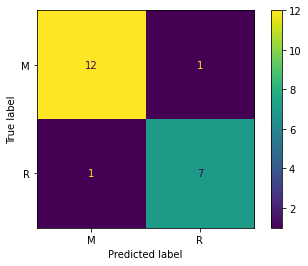

In [42]:
plot_confusion_matrix(knn_cv, X_test, y_test)

The model predicted one point as a rock when it was actually a mine. 